In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

data=pd.read_csv('AMZN.csv')


In [2]:
pip install torch

     -------------------------------------- 172.4/172.4 MB 2.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000
...,...,...,...,...,...,...,...
6511,2023-03-30,101.550003,103.040001,101.010002,102.000000,102.000000,53633400
6512,2023-03-31,102.160004,103.489998,101.949997,103.290001,103.290001,56704300
6513,2023-04-03,102.300003,103.290001,101.430000,102.410004,102.410004,41135700
6514,2023-04-04,102.750000,104.199997,102.110001,103.949997,103.949997,48662500


In [6]:
data=data[['Date','Close']]
data

,Date,Close
0,1997-05-15,0.097917
1,1997-05-16,0.086458
2,1997-05-19,0.085417
3,1997-05-20,0.081771
4,1997-05-21,0.071354
...,...,...
6511,2023-03-30,102.000000
6512,2023-03-31,103.290001
6513,2023-04-03,102.410004
6514,2023-04-04,103.949997


In [7]:
data['Date']=pd.to_datetime(data['Date'])

C:\Users\arsha\AppData\Local\Temp\ipykernel_19952\1428478067.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date']=pd.to_datetime(data['Date'])


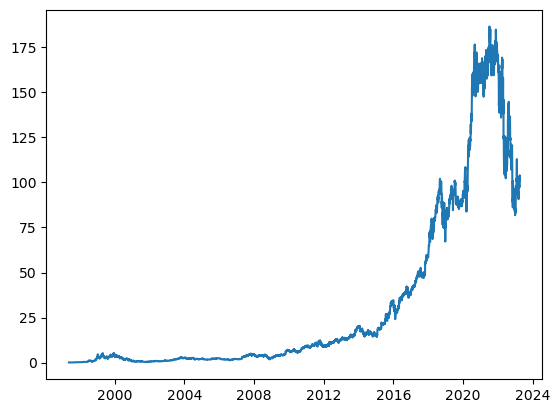

In [8]:
plt.plot(data['Date'],data['Close'])

In [13]:
#we look back at 2 weeks data to predeict current price using lstm seq. generator

from copy import deepcopy as dc

def prepare_dataframe_for_lstm(df, n_steps):
    df=dc(df)
    df['Date']=pd.to_datetime(df['Date'])
    df.set_index('Date',inplace=True)
    for i in range(1,n_steps+1):
        df[f'Close(t-{i})']=df['Close'].shift(i)
    df.dropna(inplace=True)
    return df
lookback=14
shifted_df=prepare_dataframe_for_lstm(data,lookback)
shifted_df

,Close,Close(t-1),Close(t-2),Close(t-3),Close(t-4),Close(t-5),Close(t-6),Close(t-7),Close(t-8),Close(t-9),Close(t-10),Close(t-11),Close(t-12),Close(t-13),Close(t-14)
Date,,,,,,,,,,,,,,,
1997-06-05,0.077083,0.070833,0.073958,0.075521,0.075000,0.075260,0.076563,0.079167,0.075000,0.069792,0.071354,0.081771,0.085417,0.086458,0.097917
1997-06-06,0.082813,0.077083,0.070833,0.073958,0.075521,0.075000,0.075260,0.076563,0.079167,0.075000,0.069792,0.071354,0.081771,0.085417,0.086458
1997-06-09,0.084375,0.082813,0.077083,0.070833,0.073958,0.075521,0.075000,0.075260,0.076563,0.079167,0.075000,0.069792,0.071354,0.081771,0.085417
1997-06-10,0.079167,0.084375,0.082813,0.077083,0.070833,0.073958,0.075521,0.075000,0.075260,0.076563,0.079167,0.075000,0.069792,0.071354,0.081771
1997-06-11,0.077083,0.079167,0.084375,0.082813,0.077083,0.070833,0.073958,0.075521,0.075000,0.075260,0.076563,0.079167,0.075000,0.069792,0.071354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-30,102.000000,100.250000,97.239998,98.040001,98.129997,98.709999,98.699997,100.610001,97.709999,98.949997,100.040001,96.199997,94.879997,92.430000,90.730003
2023-03-31,103.290001,102.000000,100.250000,97.239998,98.040001,98.129997,98.709999,98.699997,100.610001,97.709999,98.949997,100.040001,96.199997,94.879997,92.430000
2023-04-03,102.410004,103.290001,102.000000,100.250000,97.239998,98.040001,98.129997,98.709999,98.699997,100.610001,97.709999,98.949997,100.040001,96.199997,94.879997


In [17]:
shifted_df_as_np=shifted_df.to_numpy()
shifted_df_as_np


array([[7.70830000e-02, 7.08330000e-02, 7.39580000e-02, ...,
        8.54170000e-02, 8.64580000e-02, 9.79170000e-02],
       [8.28130000e-02, 7.70830000e-02, 7.08330000e-02, ...,
        8.17710000e-02, 8.54170000e-02, 8.64580000e-02],
       [8.43750000e-02, 8.28130000e-02, 7.70830000e-02, ...,
        7.13540000e-02, 8.17710000e-02, 8.54170000e-02],
       ...,
       [1.02410004e+02, 1.03290001e+02, 1.02000000e+02, ...,
        1.00040001e+02, 9.61999970e+01, 9.48799970e+01],
       [1.03949997e+02, 1.02410004e+02, 1.03290001e+02, ...,
        9.89499970e+01, 1.00040001e+02, 9.61999970e+01],
       [1.01099998e+02, 1.03949997e+02, 1.02410004e+02, ...,
        9.77099990e+01, 9.89499970e+01, 1.00040001e+02]])

In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
shifted_df_as_np = scaler.fit_transform(shifted_df_as_np)

shifted_df_as_np

array([[-0.99997207, -1.        , -0.99996649, ..., -0.99983244,
        -0.99982128, -0.99969839],
       [-0.99991063, -0.99993298, -1.        , ..., -0.99987154,
        -0.99983244, -0.99982128],
       [-0.99989387, -0.99987153, -0.99993298, ..., -0.99998325,
        -0.99987154, -0.99983244],
       ...,
       [ 0.09745534,  0.10690997,  0.09307615, ...,  0.07206254,
         0.03088303,  0.01672758],
       [ 0.11397036,  0.09747299,  0.10690997, ...,  0.06037353,
         0.07206254,  0.03088303],
       [ 0.08340672,  0.11398769,  0.09747299, ...,  0.04707602,
         0.06037353,  0.07206254]])

In [20]:
x=shifted_df_as_np[:,1:]
y=shifted_df_as_np[:,0]

x.shape , y.shape

((6502, 14), (6502,))

In [22]:
x= dc(np.flip(x, axis=1))
x

array([[-0.99969839, -0.99982128, -0.99983244, ..., -0.99994973,
        -0.99996649, -1.        ],
       [-0.99982128, -0.99983244, -0.99987154, ..., -0.99996649,
        -1.        , -0.99993298],
       [-0.99983244, -0.99987154, -0.99998325, ..., -1.        ,
        -0.99993298, -0.99987153],
       ...,
       [ 0.01672758,  0.03088303,  0.07206254, ...,  0.07430936,
         0.09307615,  0.10690997],
       [ 0.03088303,  0.07206254,  0.06037353, ...,  0.09307615,
         0.10690997,  0.09747299],
       [ 0.07206254,  0.06037353,  0.04707602, ...,  0.10690997,
         0.09747299,  0.11398769]])

In [23]:
split_index=int(len(x)*0.95)
split_index

6176

In [24]:
x_train=x[:split_index]
x_test=x[split_index:]

y_train=y[:split_index]
y_test=y[split_index:]
x_train.shape,x_test.shape , y_train.shape, y_test.shape

((6176, 14), (326, 14), (6176,), (326,))

In [26]:
x_train = x_train.reshape((-1, lookback, 1))
x_test = x_test.reshape((-1, lookback, 1))

y_train = y_train.reshape((-1, 1))
y_test = y_test.reshape((-1, 1))

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((6176, 14, 1), (326, 14, 1), (6176, 1), (326, 1))

In [28]:
x_train = torch.tensor(x_train).float()
y_train = torch.tensor(y_train).float()
x_test = torch.tensor(x_test).float()
y_test = torch.tensor(y_test).float()

x_train.shape, x_test.shape, y_train.shape, y_test.shape

(torch.Size([6176, 14, 1]),
 torch.Size([326, 14, 1]),
 torch.Size([6176, 1]),
 torch.Size([326, 1]))

In [29]:
from torch.utils.data import Dataset

class TimeSeriesDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)

    def __getitem__(self, i):
        return self.x[i], self.y[i]
    
train_dataset = TimeSeriesDataset(x_train, y_train)
test_dataset = TimeSeriesDataset(x_test, y_test)

In [30]:
from torch.utils.data import DataLoader

batch_size = 16

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [32]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [33]:
for _, batch in enumerate(train_loader):
    x_batch, y_batch = batch[0].to(device), batch[1].to(device)
    print(x_batch.shape, y_batch.shape)
    break

torch.Size([16, 14, 1]) torch.Size([16, 1])


In [34]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_stacked_layers):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_stacked_layers = num_stacked_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_stacked_layers, 
                            batch_first=True)
        
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
        c0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
        
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

model = LSTM(1, 4, 1)
model.to(device)
model

LSTM(
  (lstm): LSTM(1, 4, batch_first=True)
  (fc): Linear(in_features=4, out_features=1, bias=True)
)

In [35]:
def train_one_epoch():
    model.train(True)
    print(f'Epoch: {epoch + 1}')
    running_loss = 0.0
    
    for batch_index, batch in enumerate(train_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)
        
        output = model(x_batch)
        loss = loss_function(output, y_batch)
        running_loss += loss.item()
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch_index % 100 == 99:  # print every 100 batches
            avg_loss_across_batches = running_loss / 100
            print('Batch {0}, Loss: {1:.3f}'.format(batch_index+1,
                                                    avg_loss_across_batches))
            running_loss = 0.0
    print()

In [36]:
def validate_one_epoch():
    model.train(False)
    running_loss = 0.0
    
    for batch_index, batch in enumerate(test_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)
        
        with torch.no_grad():
            output = model(x_batch)
            loss = loss_function(output, y_batch)
            running_loss += loss.item()

    avg_loss_across_batches = running_loss / len(test_loader)
    
    print('Val Loss: {0:.3f}'.format(avg_loss_across_batches))
    print('***************************************************')
    print()

In [37]:
learning_rate = 0.001
num_epochs = 10
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    train_one_epoch()
    validate_one_epoch()

Epoch: 1
Batch 100, Loss: 0.389
Batch 200, Loss: 0.259
Batch 300, Loss: 0.180

Val Loss: 0.231
***************************************************

Epoch: 2
Batch 100, Loss: 0.033
Batch 200, Loss: 0.013
Batch 300, Loss: 0.007

Val Loss: 0.014
***************************************************

Epoch: 3
Batch 100, Loss: 0.003
Batch 200, Loss: 0.002
Batch 300, Loss: 0.001

Val Loss: 0.008
***************************************************

Epoch: 4
Batch 100, Loss: 0.001
Batch 200, Loss: 0.000
Batch 300, Loss: 0.000

Val Loss: 0.007
***************************************************

Epoch: 5
Batch 100, Loss: 0.000
Batch 200, Loss: 0.000
Batch 300, Loss: 0.000

Val Loss: 0.006
***************************************************

Epoch: 6
Batch 100, Loss: 0.000
Batch 200, Loss: 0.000
Batch 300, Loss: 0.000

Val Loss: 0.006
***************************************************

Epoch: 7
Batch 100, Loss: 0.000
Batch 200, Loss: 0.000
Batch 300, Loss: 0.000

Val Loss: 0.006
*****************

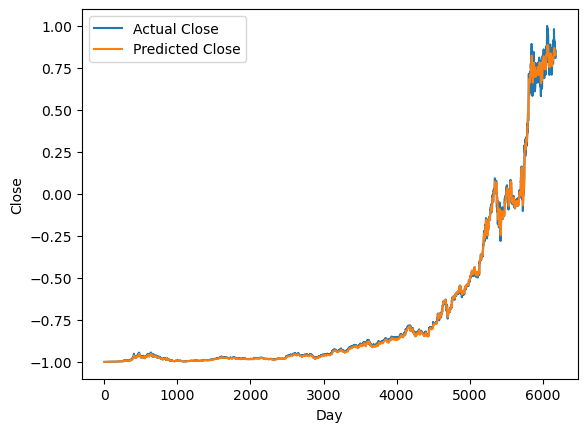

In [39]:
with torch.no_grad():
    predicted = model(x_train.to(device)).to('cpu').numpy()

plt.plot(y_train, label='Actual Close')
plt.plot(predicted, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()


In [40]:
train_predictions = predicted.flatten()

dummies = np.zeros((x_train.shape[0], lookback+1))
dummies[:, 0] = train_predictions
dummies = scaler.inverse_transform(dummies)

train_predictions = dc(dummies[:, 0])
train_predictions

array([6.97658038e-02, 7.03438373e-02, 7.23002583e-02, ...,
       1.70655622e+02, 1.70172519e+02, 1.70406234e+02])

In [41]:
dummies = np.zeros((x_train.shape[0], lookback+1))
dummies[:, 0] = y_train.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_train = dc(dummies[:, 0])
new_y_train

array([7.70857088e-02, 8.28104636e-02, 8.43722657e-02, ...,
       1.69091508e+02, 1.73315004e+02, 1.68871005e+02])

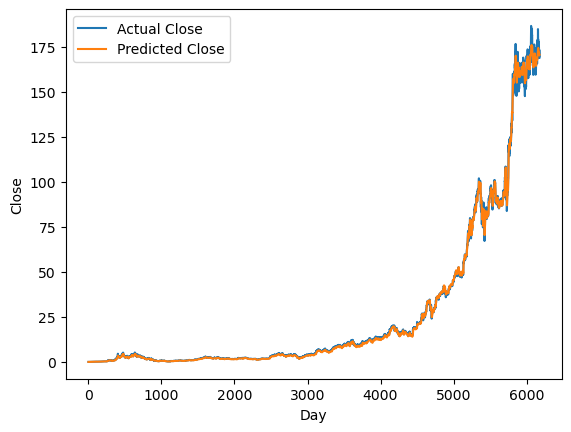

In [42]:
plt.plot(new_y_train, label='Actual Close')
plt.plot(train_predictions, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()


In [46]:
test_predictions = model(x_test.to(device)).detach().cpu().numpy().flatten()

dummies = np.zeros((x_test.shape[0], lookback+1))
dummies[:, 0] = test_predictions
dummies = scaler.inverse_transform(dummies)

test_predictions = dc(dummies[:, 0])
test_predictions

array([169.87076359, 169.68831621, 169.09600973, 169.18298154,
       169.27580038, 169.33780559, 169.16973123, 169.20207887,
       168.99894456, 168.79196411, 168.35223624, 168.60780486,
       168.29912385, 167.59639074, 166.92567179, 166.27786298,
       165.58401157, 165.66750407, 165.63621245, 164.94064917,
       164.61380458, 163.77899081, 162.68885298, 160.97973019,
       157.84807808, 155.6933804 , 152.88606066, 150.33668838,
       148.43539169, 147.9534896 , 148.91593761, 150.043492  ,
       150.81545574, 148.74246087, 151.51139696, 153.6092028 ,
       155.94012289, 157.64372101, 158.53120252, 158.1118281 ,
       158.21619649, 158.52913494, 159.04885375, 158.74171787,
       158.1072483 , 157.12141216, 155.21046676, 155.10674309,
       155.40459709, 155.57259363, 155.20266331, 155.13952426,
       154.21276982, 153.03090252, 150.22922972, 147.63084687,
       146.31754364, 147.12444506, 147.45658088, 146.86294048,
       147.75270077, 149.74789456, 152.17243384, 154.84

In [48]:
dummies = np.zeros((x_test.shape[0], lookback+1))
dummies[:, 0] = y_test.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_test = dc(dummies[:, 0])
new_y_test

array([170.01750073, 167.07899518, 170.41700525, 171.03700176,
       171.06849902, 169.66949677, 170.66099652, 169.20100618,
       168.64449887, 166.71699614, 170.40449416, 167.52200227,
       164.35699652, 163.25399744, 162.55399887, 161.48599305,
       165.36200225, 165.20700034, 161.21400606, 162.13799817,
       158.91749564, 156.29899833, 151.66749379, 142.64300691,
       144.54400347, 139.98599256, 138.87249717, 139.63749672,
       143.97799751, 149.57350074, 151.19349521, 150.61250484,
       138.84550467, 157.63949692, 157.93550009, 161.41349987,
       161.18950077, 159.0034948 , 153.29350203, 155.16700864,
       156.51049745, 158.10049531, 154.65249769, 152.60150144,
       150.19749346, 144.82699533, 151.35800132, 153.78849879,
       153.56300459, 151.1420002 , 152.05250301, 147.89849861,
       145.64100545, 137.45300252, 136.01449668, 139.27900757,
       146.81750371, 145.52450391, 141.8529963 , 147.36650214,
       153.10400152, 157.23899751, 161.25050554, 161.49

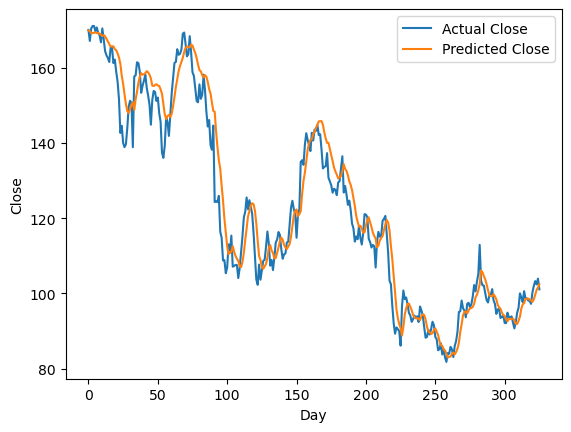

In [49]:
plt.plot(new_y_test, label='Actual Close')
plt.plot(test_predictions, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()


In [50]:
#our predictions are close